In [1]:
from gensim import corpora, models, similarities
import numpy as np
from scipy import io
from sklearn import manifold


In [2]:

import csv
import numpy as np
import prepre
####from nltk.stem import PorterStemmer
from gensim import corpora, models, similarities



file_name ='hey.csv'
file_name ='qqq2_pesdo.csv'
aaa=[]
yyy1=[]
yyy2=[]

###lmtzr = PorterStemmer()
### read data from hey.csv
with open(file_name, 'r') as f:
    reader = csv.reader(f)
    ###header = next(reader)
    for row in reader:
        ###aaa.append(row[0])
        yyy1.append(row[0])
        yyy2.append(row[1])

corpus = corpora.MmCorpus('deerwester3.mm')
dictionary = corpora.Dictionary.load('deerwester3.dict')

corpus_sci = io.mmread('deerwester3.mm')
dictionary = corpora.Dictionary.load('deerwester3.dict')
train_X = corpus_sci.toarray().astype('float32')
print train_X.shape
####np.mean(np.sum(ee*np.array([[0,1,1],[0,0,1]]),axis=1))

yyy4=[]
for  tempp in yyy1:
    temp = tempp.split(", ")
    for i in range(len(temp)):
        temp[i] = temp[i].strip("[")
        temp[i] =temp[i].strip("]")

    yyy4.append(map(int,temp))

(46467, 21771)


In [73]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

print np.array(train_X).shape
print len(corpus_tfidf)

kkkk = len(dictionary.token2id)

'''
### to see the keys
print dictionary.token2id
'''

print corpus_tfidf
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=50)
corpus_lsi = lsi[corpus_tfidf]
heyhey = np.array(list(corpus_lsi))

(10000, 2)
46467
[[  0.00000000e+00   1.03627681e-01]
 [  1.00000000e+00  -6.07071586e-02]
 [  2.00000000e+00   6.99062702e-02]
 [  3.00000000e+00  -8.92282180e-02]
 [  4.00000000e+00   3.55735470e-02]
 [  5.00000000e+00   4.01005258e-02]
 [  6.00000000e+00   3.72979928e-03]
 [  7.00000000e+00   1.28276944e-02]
 [  8.00000000e+00   1.03674811e-03]
 [  9.00000000e+00   8.40525445e-04]
 [  1.00000000e+01  -1.62316769e-02]
 [  1.10000000e+01   2.38930560e-02]
 [  1.20000000e+01  -2.77452210e-02]
 [  1.30000000e+01  -2.81660930e-02]
 [  1.40000000e+01  -1.70076827e-02]
 [  1.50000000e+01   2.21633584e-02]
 [  1.60000000e+01  -8.63913841e-03]
 [  1.70000000e+01   9.37265715e-03]
 [  1.80000000e+01  -3.50243473e-02]
 [  1.90000000e+01   3.39255459e-02]
 [  2.00000000e+01   1.54156867e-02]
 [  2.10000000e+01  -2.35437956e-02]
 [  2.20000000e+01  -2.73784064e-02]
 [  2.30000000e+01   3.19830392e-02]
 [  2.40000000e+01   3.62730821e-02]
 [  2.50000000e+01   1.68847061e-02]
 [  2.60000000e+01   

In [75]:
heyhey = np.array(list(corpus_lsi))
heyhey2 = [i[:,1] for i in heyhey]

In [86]:
from sklearn import svm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

X = [[0, 0], [1, 1]]
y = [0, 1]
yyy4 = np.array(yyy4)
train_X = np.array(heyhey2[0:40000])
test_X = np.array(heyhey2[-1000:])

train_y = MultiLabelBinarizer().fit_transform(yyy4)[0:40000]
test_y = MultiLabelBinarizer().fit_transform(yyy4)[-1000:]
pred_y = OneVsRestClassifier(LinearSVC(random_state=0)).fit(train_X, train_y).predict(test_X)


In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
         

print classification_report(np.argmax(pred_y,axis=1),np.argmax(np.array(test_y[-1000:]),axis=1))

             precision    recall  f1-score   support

          0       0.81      0.04      0.08       557
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.02      1.00      0.05         2
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0
         10       0.11      0.50      0.18         2
         11       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         0
         21       0.00      0.00      0.00         0
         23       0.00      0.00      0.00         0
         24       0.00      0.00      0.00         0
         25       0.00      0.00      0.00         0
         27       0.00      0.00      0.00   

/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


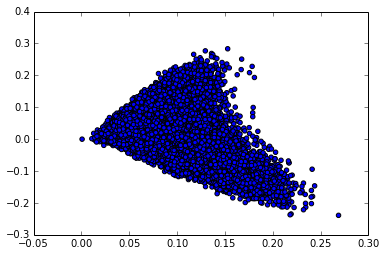

In [11]:
hey1 =[]
hey2 =[]
for i in heyhey:
    if(i!=[]):
        hey1.append(i[0][1])
        hey2.append(i[1][1])  


%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(hey1,hey2)
plt.show()  

['[2]', '[2]', '[3]', '[3]', '[3]', '[3]', '[3]', '[2]', '[2]', '[2]']
['g', 'g', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'g']


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


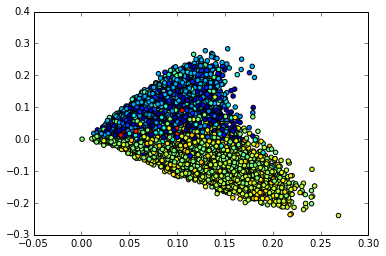

In [6]:
hey1 =[]
hey2 =[]
def make_color(i):
    if(i=='[1]'):
        return 'b'
    elif(i=='[2]'):
        return 'g'
    elif(i=='[3]'):
        return 'r'
    elif(i=='[4]'):
        return 'c'
    else:
        return 'm'
print yyy2[0:10]
yyy3 = map(make_color,yyy2)
print yyy3[0:10]

yyy4=[]
for  tempp in yyy1:
    temp = tempp.split(", ")
    for i in range(len(temp)):
        temp[i] = temp[i].strip("[")
        temp[i] =temp[i].strip("]")

    yyy4.append(map(int,temp))

yyy5 = [(i[0]*1.0)/159.0 for i in yyy4]
for i in np.array(list(corpus_lsi)):
    hey1.append(i[0][1])
    hey2.append(i[1][1])                 
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(hey1,hey2,c =yyy5)
plt.savefig('pesdo3.png')
plt.show()

In [34]:
corpus_sci = io.mmread('deerwester2.mm')
dictionary = corpora.Dictionary.load('deerwester2.dict')
train_X = corpus_sci.toarray()
print train_X

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]]


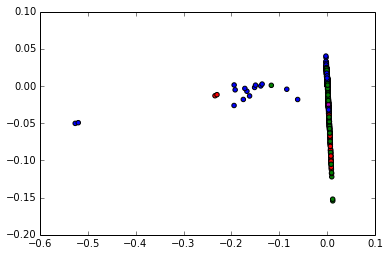

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
X = np.array([[1,2,3],[2,3,4],[5,6,7],[8,9,10]])
y = manifold.locally_linear_embedding(train_X[0:3000],n_neighbors=4, n_components=2)

hey1 =[]
hey2 =[]
for i in y[0]:
    ####if(i!=[]):
        hey1.append(i[0])
        hey2.append(i[1])  
plt.scatter(hey1,hey2,c=yyy3[0:3000])
plt.show()      

/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


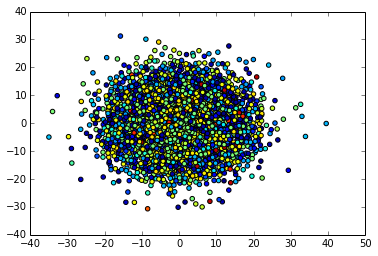

In [97]:
###y = manifold.Isomap( n_components=2).fit_transform(train_X[0:300])
mds = manifold.MDS(n_components=2, max_iter=100, n_init=1).fit_transform(train_X[0:5000])

hey1 =[]
hey2 =[]
for i in mds:
    if(i!=[]):
        hey1.append(i[0])
        hey2.append(i[1])  
plt.scatter(hey1,hey2,c=yyy5[0:5000])
plt.show() 

In [ ]:


print len(heyhey2)
sne = manifold.TSNE(n_components=2, init='pca', perplexity=5.0,random_state=0).fit_transform(heyhey2[0:8000])

hey1 =[]
hey2 =[]
for i in sne:
    if(i!=[]):
        hey1.append(i[0])
        hey2.append(i[1])  
plt.scatter(hey1,hey2,c=yyy5[0:8000])
plt.savefig("pesdo6_deep.png")
plt.show() 

In [15]:
print y

[[  8.39275817e-02  -9.47141654e-02]
 [ -3.09918779e-02   1.13605021e-01]
 [ -9.22918350e-02   3.23458464e-01]
 [ -3.23742889e-02   1.73234769e-01]
 [ -5.49481928e-02   1.58176727e-01]
 [ -4.72927821e-03   6.51732441e-02]
 [  4.58449320e-02  -2.67377816e-02]
 [ -2.75856792e-01   7.60597815e-01]
 [  7.74460471e-02  -8.32201933e-02]
 [  7.65376779e-02  -8.16068917e-02]
 [ -9.57609645e-02   2.34921300e-01]
 [ -3.83159425e-02   1.27192880e-01]
 [ -3.09918779e-02   1.13605021e-01]
 [ -6.43463877e-02   1.75760654e-01]
 [  1.56446770e-02   2.79264780e-02]
 [ -8.37939231e-02   2.12316251e-01]
 [ -5.01057237e-01   1.27200579e+00]
 [ -7.08929397e-03   6.95063860e-02]
 [ -5.51554731e-03   6.66164603e-02]
 [ -3.13812137e-01   6.59975913e-01]
 [ -1.32222583e-01   3.04293735e-01]
 [ -1.14986169e-01   2.71407545e-01]
 [ -1.00469851e-01   2.43838690e-01]
 [  8.06082304e-02  -7.12225731e-02]
 [  1.20305057e-01  -1.58668743e-01]
 [  4.91124252e-02  -3.26121451e-02]
 [ -6.60768459e-02   1.79004210e-01]
 